## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [102]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [103]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [104]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 3 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [105]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["MSFT","KO"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-25 04:00:00+00:00,273.290,281.1100,270.7700,280.72,35442972,502608,276.913262,MSFT
2022-04-26 04:00:00+00:00,277.500,278.3599,270.0000,270.22,46312786,698272,273.105528,MSFT
2022-04-27 04:00:00+00:00,282.100,290.9700,279.1600,283.22,63045776,816714,285.168411,MSFT
2022-04-28 04:00:00+00:00,285.185,290.9800,281.4562,289.63,33415185,443000,286.928320,MSFT
2022-04-29 04:00:00+00:00,288.610,289.8800,276.5000,277.52,36577414,471884,281.528434,MSFT


In [106]:
# Reorganize the DataFrame
# Separate ticker data
MSFT = df_ticker[df_ticker['symbol']=='MSFT'].drop('symbol', axis=1)
KO = df_ticker[df_ticker['symbol']=='KO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([MSFT, KO], axis=1, keys=["MSFT", "KO"])

# Display sample data
df_ticker.head()

MSFT                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-05-01 04:00:00+00:00  130.53  130.65  127.70  127.88  26821713   
2019-05-02 04:00:00+00:00  127.98  128.00  125.52  126.21  27350161   
2019-05-03 04:00:00+00:00  127.36  129.43  127.25  128.90  24912269   
2019-05-06 04:00:00+00:00  126.39  128.56  126.11  128.15  24239514   
2019-05-07 04:00:00+00:00  126.46  127.18  124.22  125.52  36017941   

                                                      KO                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2019-05-01 04:00:00+00:00      176194  129.123388  48.95  49.0750  48.55   
2019-05-02 04:00:00+00:00      215743  126.561512  48.53  48.7657  48.27   
2019-05-03 04:00:00+00:00      161470  128.562162  48.60  48.9600  48.52   
2019-05-06 04:00:00+00:00      186211  127.785209  48.33  48.6100  48.26   
2019-05-07 04:00:00+00:00      282980  125.425674  48.23  48.2900  47.77   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2019-05-01 04:00:00+00:00  48.59  10551594       55430  48.792137  
2019-05-02 04:00:00+00:00  48.39   8724932       49477  48.453170  
2019-05-03 04:00:00+00:00  48.72   7076949       39003  48.773171  
2019-05-06 04:00:00+00:00  48.47   8658209       44597  48.465858  
2019-05-07 04:00:00+00:00  48.00  12487481       59828  48.012280

### The MCForecastTools Library at a Glance

In [107]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Simulate five year portfolio growth using Monte Carlo simulation

In [109]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [110]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

MSFT                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-05-01 04:00:00+00:00  130.53  130.65  127.70  127.88  26821713   
2019-05-02 04:00:00+00:00  127.98  128.00  125.52  126.21  27350161   
2019-05-03 04:00:00+00:00  127.36  129.43  127.25  128.90  24912269   
2019-05-06 04:00:00+00:00  126.39  128.56  126.11  128.15  24239514   
2019-05-07 04:00:00+00:00  126.46  127.18  124.22  125.52  36017941   

                                                                   KO  \
                          trade_count        vwap daily_return   open   
timestamp                                                               
2019-05-01 04:00:00+00:00      176194  129.123388          NaN  48.95   
2019-05-02 04:00:00+00:00      215743  126.561512    -0.013059  48.53   
2019-05-03 04:00:00+00:00      161470  128.562162     0.021314  48.60   
2019-05-06 04:00:00+00:00      186211  127.785209    -0.005818  48.33   
2019-05-07 04:00:00+00:00      282980  125.425674    -0.020523  48.23   

                                                                        \
                              high    low  close    volume trade_count   
timestamp                                                                
2019-05-01 04:00:00+00:00  49.0750  48.55  48.59  10551594       55430   
2019-05-02 04:00:00+00:00  48.7657  48.27  48.39   8724932       49477   
2019-05-03 04:00:00+00:00  48.9600  48.52  48.72   7076949       39003   
2019-05-06 04:00:00+00:00  48.6100  48.26  48.47   8658209       44597   
2019-05-07 04:00:00+00:00  48.2900  47.77  48.00  12487481       59828   

                                                   
                                vwap daily_return  
timestamp                                          
2019-05-01 04:00:00+00:00  48.792137          NaN  
2019-05-02 04:00:00+00:00  48.453170    -0.004116  
2019-05-03 04:00:00+00:00  48.773171     0.006820  
2019-05-06 04:00:00+00:00  48.465858    -0.005131  
2019-05-07 04:00:00+00:00  48.012280    -0.009697

In [111]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\rwhit\onedrive\desktop\my_API_projects\APIs 3\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992691,0.980501,1.013003,0.974852,1.002527,1.007273,1.000639,0.979258,0.993245,1.002959,...,0.991202,0.988020,0.991950,0.992193,0.987227,0.980783,1.002232,0.995691,1.009079,0.971311
2,0.985106,1.008336,1.009570,0.969502,0.996797,1.006680,0.990069,0.984034,0.988625,1.018759,...,0.996934,0.980098,0.982037,1.003587,0.981789,1.001023,0.980716,0.979829,1.010728,0.997371
3,0.966069,0.992613,0.998337,0.960316,0.988870,1.000597,0.976660,0.976677,0.995359,1.043249,...,0.985564,0.984463,0.971972,1.011238,0.978979,1.010420,0.989438,0.950376,0.998664,0.999666
4,0.969409,0.992619,1.000101,0.948685,0.989262,1.003805,0.979669,0.984303,1.004637,1.050793,...,0.965289,0.984777,0.957205,1.025117,1.000091,1.021003,0.968684,0.957472,1.016221,1.008182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,5.077410,1.537305,1.722410,2.806920,3.280711,2.068219,1.506723,4.978046,6.893408,2.467846,...,3.689638,4.910379,1.969468,5.624235,2.229070,2.137460,6.064554,2.442777,2.259363,2.144956
1257,5.026110,1.553863,1.733647,2.748526,3.281493,2.083986,1.524874,4.993632,6.970516,2.446141,...,3.733801,4.928117,2.028919,5.453564,2.225867,2.132005,5.977323,2.430788,2.260392,2.142759
1258,5.073325,1.568933,1.749210,2.855245,3.370962,2.077600,1.497818,4.940893,7.172024,2.425826,...,3.753676,4.945728,2.004479,5.453609,2.241900,2.133187,6.001543,2.434801,2.309486,2.170487
1259,5.000917,1.533194,1.731814,2.820650,3.351780,2.034555,1.527207,4.895778,7.043219,2.464413,...,3.766694,4.781833,1.990910,5.490143,2.270438,2.170106,5.959777,2.415527,2.278615,2.139822


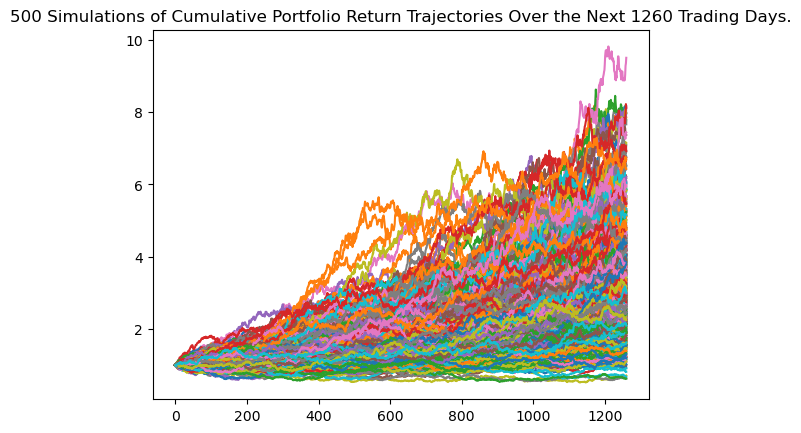

In [112]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

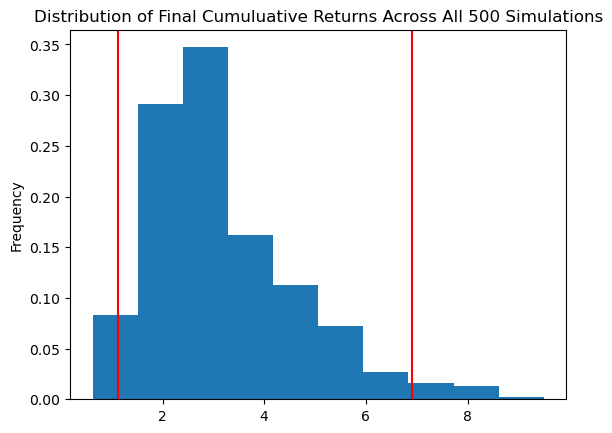

In [113]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [114]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.171861
std               1.469238
min               0.627962
25%               2.148618
50%               2.833110
75%               3.925205
max               9.498834
95% CI Lower      1.121304
95% CI Upper      6.916073
Name: 1260, dtype: float64


In [115]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $11213.04 and $69160.73
